<a href="https://colab.research.google.com/github/GGrinspun/AV2-AVD_2023/blob/main/AVII_Avd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from statistics import variance
from google.colab import drive
import statsmodels.api as sm
import sklearn

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
db_app = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/application_record.csv')

In [ ]:
db_cred = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/credit_record.csv')

#Descrevendo o Data Set

In [ ]:
db_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [ ]:
db_app.shape

(438557, 18)

In [ ]:
#informaçoes basicas do Data set
db_app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
db_cred.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
df_contador_incidencias = pd.crosstab(db_cred.ID,db_cred.STATUS).reset_index()
df_contador_incidencias['soma'] = df_contador_incidencias['0']+df_contador_incidencias['1']+df_contador_incidencias['2']+df_contador_incidencias['3']+df_contador_incidencias['4']+df_contador_incidencias['5']+df_contador_incidencias['C']+df_contador_incidencias['X']
df_contador_incidencias

STATUS,ID,0,1,2,3,4,5,C,X,soma
0,5001711,3,0,0,0,0,0,0,1,4
1,5001712,10,0,0,0,0,0,9,0,19
2,5001713,0,0,0,0,0,0,0,22,22
3,5001714,0,0,0,0,0,0,0,15,15
4,5001715,0,0,0,0,0,0,0,60,60
...,...,...,...,...,...,...,...,...,...,...
45980,5150482,12,0,0,0,0,0,6,0,18
45981,5150483,0,0,0,0,0,0,0,18,18
45982,5150484,12,0,0,0,0,0,1,0,13
45983,5150485,2,0,0,0,0,0,0,0,2


O classificador criado seguirá a seguinte lógica:
* X (n pegou empréstimo) = +0
* C (pagou o empréstimo no mes) = +2
* 0 (pago em até 30 dias de atraso) = +5
* 1 (pago entre 30 e 59 dias) = +3
* 2 (pago entre 60 e 89 dias) = +4
* 3 (pago entre 90 e 119 dias) = -3
* 4 (pago entre 120 e 149 dias) = -5
* 5 (não pago por mais de 150 dias, write offs, e não pago) = -10


In [ ]:
df_contador_incidencias['acumulador_de_credibilidade'] = (df_contador_incidencias['0'] * 5) + (df_contador_incidencias['C'] * 2) + (df_contador_incidencias['1'] * 3) + (df_contador_incidencias['2'] * 4) + (df_contador_incidencias['3'] * -3) + (df_contador_incidencias['4'] * - 5) + (df_contador_incidencias['5'] * -10)

In [ ]:
df_contador_incidencias.head(10)

STATUS,ID,0,1,2,3,4,5,C,X,soma,acumulador_de_credibilidade
0,5001711,3,0,0,0,0,0,0,1,4,15
1,5001712,10,0,0,0,0,0,9,0,19,68
2,5001713,0,0,0,0,0,0,0,22,22,0
3,5001714,0,0,0,0,0,0,0,15,15,0
4,5001715,0,0,0,0,0,0,0,60,60,0
5,5001717,17,0,0,0,0,0,5,0,22,95
6,5001718,24,2,0,0,0,0,3,10,39,132
7,5001719,2,0,0,0,0,0,41,0,43,92
8,5001720,29,7,0,0,0,0,0,0,36,166
9,5001723,8,0,0,0,0,0,0,23,31,40


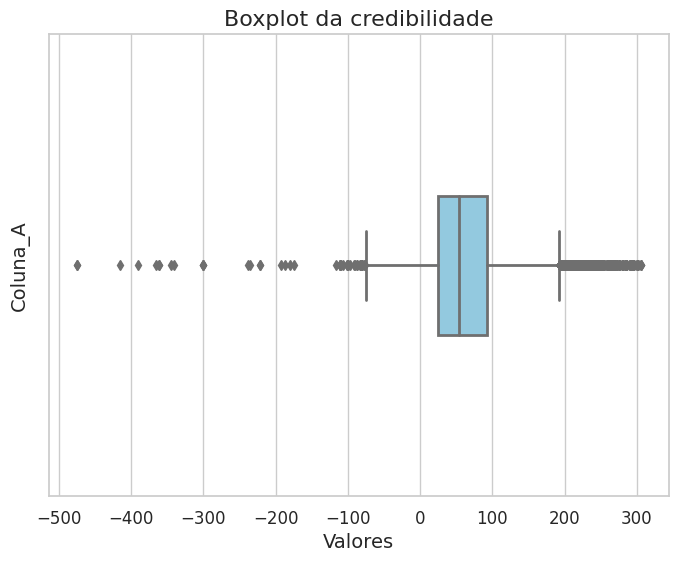

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_contador_incidencias['acumulador_de_credibilidade'], color='skyblue', width=0.3, linewidth=2)
plt.title('Boxplot da credibilidade', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Coluna_A', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

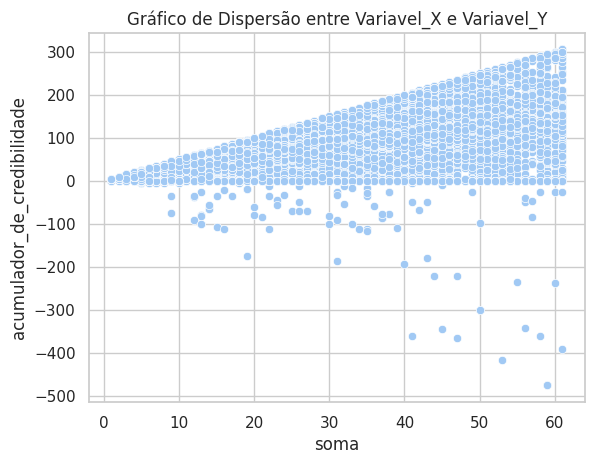

In [ ]:
sns.scatterplot(x = 'soma', y='acumulador_de_credibilidade', data=df_contador_incidencias)
plt.title('Gráfico de Dispersão entre Variavel_X e Variavel_Y')
plt.show()

In [ ]:
df_contador_incidencias['acumulador_de_credibilidade'].describe()

count    45985.000000
mean        61.267783
std         49.234745
min       -475.000000
25%         25.000000
50%         54.000000
75%         92.000000
max        305.000000
Name: acumulador_de_credibilidade, dtype: float64

## a classificação de risco de cada cliente será baseada nos quartis da dimensão acumulador de credibilidade:
- Se o aplicante está nos 50% centrais significa que há pouca informação sobre o histórico ou credito dele, ou ele pode ter um histórico de pagamento de dívidas balanceado será classificado como 0
- Se o aplicante possui um acumulador de credibilidade alto (estamos considerando o quartil superior(75%) >=92) significa que ele possui um histórico documentado longo e tende a pagar suas contas em dia ou com pouco atraso, classificação 1
- se o aplicante possui um acumulador de credibilidade muito baixo (<=25) significa que o cliente possui longas dívidas ou esteve na categoria 5, o que não é bom para sua credibilidade, classificação -1

In [ ]:
df_contador_incidencias['classificação_credibilidade'] = 0

In [ ]:
#criando classificação

candidato_confiavel = (df_contador_incidencias['acumulador_de_credibilidade'] >= 92)
#candidato_medio = estarão entre 25 e 92
candidato_NAO_confiavel = (df_contador_incidencias['acumulador_de_credibilidade'] <=25)

df_contador_incidencias.loc[candidato_confiavel, 'classificação_credibilidade'] = df_contador_incidencias.loc[candidato_confiavel, 'classificação_credibilidade'] = 1

df_contador_incidencias.loc[candidato_NAO_confiavel, 'classificação_credibilidade'] = df_contador_incidencias.loc[candidato_NAO_confiavel, 'classificação_credibilidade'] = -1

In [ ]:
df_contador_incidencias['classificação_credibilidade'].value_counts()

 0    21848
-1    12636
 1    11501
Name: classificação_credibilidade, dtype: int64

>Faremos tambem uma coluna de "pré-aprovados" de candidatos que serão levados para anélise, levando em consideração apenas a metade superior e a metade inferior

In [ ]:
df_contador_incidencias['pre_aprovados'] = 0

Aprovado_p_analise = (df_contador_incidencias['acumulador_de_credibilidade'] > 54)

df_contador_incidencias.loc[Aprovado_p_analise, 'pre_aprovados'] = df_contador_incidencias.loc[Aprovado_p_analise, 'pre_aprovados'] = 1

- Agrupando os 2 Data sets por ID de clientes

In [ ]:
merged_df = pd.merge(df_contador_incidencias, db_app, on = 'ID', how = 'inner')
merged_df

,ID,0,1,2,3,4,5,C,X,soma,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,0,0,0,0,13,1,16,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,0,0,0,0,12,1,15,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,7,0,0,0,0,0,7,16,30,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,2,0,0,0,0,0,0,3,5,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,0,0,0,0,0,5,5,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,12,0,0,0,0,0,6,0,18,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36453,5150483,0,0,0,0,0,0,0,18,18,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36454,5150484,12,0,0,0,0,0,1,0,13,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36455,5150485,2,0,0,0,0,0,0,0,2,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


In [ ]:
merged_df = merged_df.drop(['0','1','2','3','4','5','C', 'X'], axis=1)
merged_df

,ID,soma,acumulador_de_credibilidade,classificação_credibilidade,pre_aprovados,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,16,34,0,0,M,Y,Y,0,427500.0,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,15,32,0,0,M,Y,Y,0,427500.0,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,30,49,0,0,M,Y,Y,0,112500.0,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,5,10,-1,0,F,N,Y,0,270000.0,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,5,0,-1,0,F,N,Y,0,270000.0,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,18,72,0,1,F,Y,Y,1,157500.0,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36453,5150483,18,0,-1,0,F,Y,Y,1,157500.0,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36454,5150484,13,62,0,1,F,Y,Y,1,157500.0,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36455,5150485,2,10,-1,0,F,Y,Y,1,157500.0,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


>Binarizando os dados simples

In [ ]:
merged_df['CODE_GENDER'] = merged_df['CODE_GENDER'].map({'M': 1, 'F': 0})

In [ ]:
merged_df['FLAG_OWN_CAR'] = merged_df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

In [ ]:
merged_df['FLAG_OWN_REALTY'] = merged_df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [ ]:
merged_df['OCCUPATION_TYPE'].nunique()

18

In [ ]:
merged_df['NAME_FAMILY_STATUS'].nunique()

5

In [ ]:
merged_df['NAME_INCOME_TYPE'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
merged_df['NAME_INCOME_TYPE'] = merged_df['NAME_INCOME_TYPE'].map({'Working': 1, 'Commercial associate': 1, 'State servant': 1, 'Pensioner': 0, 'Student': 0})

In [ ]:
merged_df = merged_df.drop(['OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE' ], axis=1)

In [ ]:
merged_df['DAYS_BIRTH'] = merged_df['DAYS_BIRTH'] / (-360)

In [ ]:
merged_df['DAYS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'] / (-360)

In [ ]:
merged_df

,ID,0,1,2,3,4,5,C,X,soma,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,0,0,0,0,13,1,16,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,0,0,0,0,12,1,15,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,7,0,0,0,0,0,7,16,30,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,2,0,0,0,0,0,0,3,5,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,0,0,0,0,0,5,5,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,12,0,0,0,0,0,6,0,18,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36453,5150483,0,0,0,0,0,0,0,18,18,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36454,5150484,12,0,0,0,0,0,1,0,13,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
36455,5150485,2,0,0,0,0,0,0,0,2,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


# 1. Classificação

---


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supondo que 'classificação_credibilidade' é a coluna que você deseja prever
# e 'feature1', 'feature2', 'feature3' são suas variáveis independentes
X = merged_df[['soma', 'AMT_INCOME_TOTAL']]
y = merged_df['pre_aprovados']

# Dividir os dados em conjuntos de treinamento e teste com 70% para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo de Regressão Logística Multinomial
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Treinar o modelo de Regressão Logística Multinomial
logistic_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = logistic_model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir métricas de desempenho
print(f'Acurácia: {accuracy:.2f}')
print('\nMatriz de Confusão:')
print(conf_matrix)
print('\nRelatório de Classificação:')
print(class_report)

Acurácia: 0.81

Matriz de Confusão:
[[5022  720]
 [1377 3819]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      5742
           1       0.84      0.73      0.78      5196

    accuracy                           0.81     10938
   macro avg       0.81      0.80      0.81     10938
weighted avg       0.81      0.81      0.81     10938



Acurácias em cada iteração:
Acurácia: 0.76897
Acurácia: 0.76732
Acurácia: 0.76358
Acurácia: 0.76678
Acurácia: 0.76979
Acurácia: 0.81532
Acurácia: 0.76806
Acurácia: 0.76394
Acurácia: 0.76678
Acurácia: 0.75763
Acurácia: 0.76175
Acurácia: 0.81587
Acurácia: 0.81889
Acurácia: 0.76650
Acurácia: 0.76815
Acurácia: 0.81267
Acurácia: 0.76449
Acurácia: 0.81807
Acurácia: 0.76815
Acurácia: 0.76751
Acurácia: 0.76595
Acurácia: 0.77912
Acurácia: 0.81349
Acurácia: 0.76952
Acurácia: 0.77144
Acurácia: 0.76440
Acurácia: 0.76147
Acurácia: 0.76623
Acurácia: 0.77098
Acurácia: 0.81011

Média da Acurácia: 0.78
Desvio Padrão da Acurácia: 0.02

Matriz de Confusão para a Média:
[[130500  42270]
 [ 30545 124825]]

Relatório de Classificação para a Média:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78    172770
           1       0.75      0.80      0.77    155370

    accuracy                           0.78    328140
   macro avg       0.78      0.78      0.78   

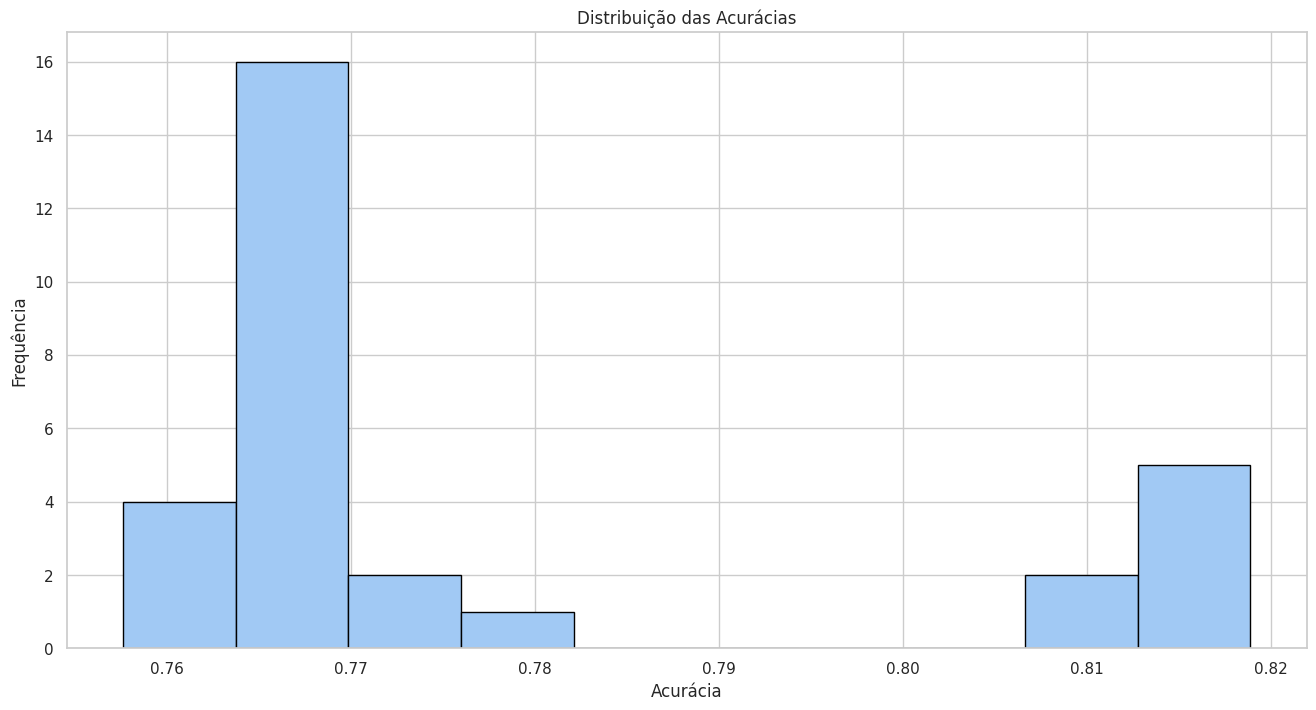

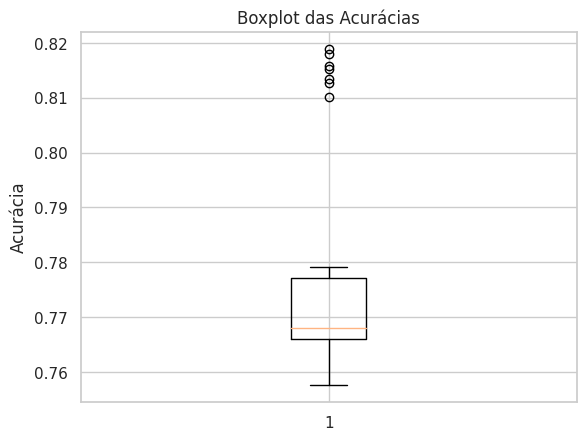

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Supondo que 'classificação_credibilidade' é a coluna que você deseja prever
# e 'feature1', 'feature2', 'feature3' são suas variáveis independentes
X = merged_df[['soma', 'AMT_INCOME_TOTAL']]
y = merged_df['pre_aprovados']

# Configurações
num_iterations = 30
accuracy_list = []

all_predictions = []
all_labels = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Dividir os dados em conjuntos de treinamento e teste com reposição (bootstrapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)

    # Inicializar o modelo de Regressão Logística Multinomial
    logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

    # Treinar o modelo de Regressão Logística Multinomial
    logistic_model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = logistic_model.predict(X_test)

    # Calcular e armazenar a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

        # Armazenar previsões e rótulos reais para a média posteriormente
    all_predictions.extend(y_pred)
    all_labels.extend(y_test)

# Calcular a média das acurácias
average_accuracy = np.mean(accuracy_list)

# Exibir as acurácias obtidas em cada iteração
print("Acurácias em cada iteração:")
for acc in accuracy_list:
    print(f"Acurácia: {acc:.5f}")

# Calcular a matriz de confusão e o relatório de classificação para a média das previsões
average_conf_matrix = confusion_matrix(all_labels, all_predictions)
average_class_report = classification_report(all_labels, all_predictions)

# Exibir a média e o desvio padrão das acurácias
print(f"\nMédia da Acurácia: {np.mean(accuracy_list):.2f}")
print(f"Desvio Padrão da Acurácia: {np.std(accuracy_list):.2f}")

print("\nMatriz de Confusão para a Média:")
print(average_conf_matrix)

print("\nRelatório de Classificação para a Média:")
print(average_class_report)

plt.figure(figsize=(16, 8))
plt.hist(accuracy_list, bins=10, edgecolor='black')
plt.title('Distribuição das Acurácias')
plt.xlabel('Acurácia')
plt.ylabel('Frequência')
plt.show()

# Boxplot das acurácias
plt.boxplot(accuracy_list)
plt.title('Boxplot das Acurácias')
plt.ylabel('Acurácia')
plt.show()

# Regressão Paramétrica
-Relação de Confiabilidade de clientes e salário:

---

Média dos Coeficientes:
[5.60319235e+01 1.18025485e-05]


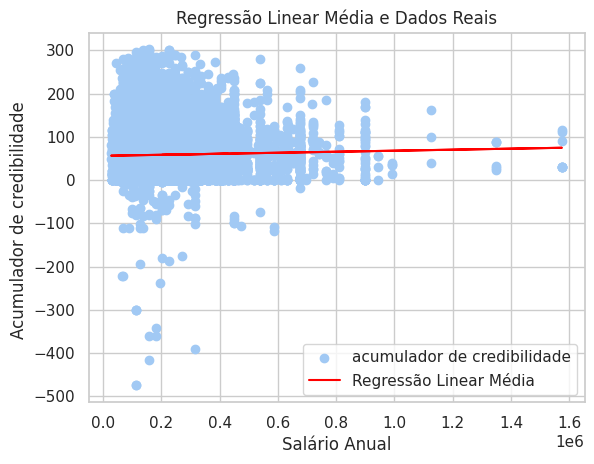


MSE Médio: 5569.61

MAE Médio: 58.50


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X = merged_df['AMT_INCOME_TOTAL']
y = merged_df['acumulador_de_credibilidade']

# Configurações
num_iterations = 30
coefficients_list = []

# Configurações
num_iterations = 30
coefficients_list = []
mse_list = []
mae_list = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Dividir os dados em conjuntos de treinamento e teste com reposição (bootstrapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Adicionando uma constante para a interceptação
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Criando um modelo de regressão linear
    model = sm.OLS(y_train, X_train_const).fit()

    # Armazenar os coeficientes estimados
    coefficients_list.append(model.params)

        # Calcular o Erro Médio Quadrático
    mse = mean_squared_error(y_test, y_pred)

    # Armazenar o MSE na lista
    mse_list.append(mse)

    # Calcular o MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

# Calcular a média dos coeficientes estimados
average_coefficients = np.mean(coefficients_list, axis=0)

# Imprimir os resultados da média dos coeficientes
print("Média dos Coeficientes:")
print(average_coefficients)

# Criar um gráfico com os dados reais e a linha de regressão
plt.scatter(X, y, label='acumulador de credibilidade')
plt.plot(X, average_coefficients[0] + average_coefficients[1] * X, color='red', label='Regressão Linear Média')
plt.xlabel('Salário Anual')
plt.ylabel('Acumulador de credibilidade ')
plt.legend()
plt.title('Regressão Linear Média e Dados Reais')
plt.show()


'''print("MSEs em cada iteração:")
for mse in mse_list:
    print(mse)'''


# Calcular a média do MSE
average_mse = np.mean(mse_list)

# Imprimir a média do MSE
print(f'\nMSE Médio: {average_mse:.2f}')

'''print("\n\n MAEs em cada iteração (suavizando para os outliers):")
for mae in mae_list:
    print(mae)'''

# Calcular a média do MSE
average_mae = np.mean(mae_list)

# Imprimir a média do MSE
print(f'\nMAE Médio: {average_mae:.2f}')

- E se o Modelo puder ser mais facilmente explorado por tempo e não por valor de salário?
1. Mostrando para quantidade de interações de análise de crédito
2. Tentativa de modelar para idade dos candidatos

Média dos Coeficientes:
[11.33255478  2.19987187]


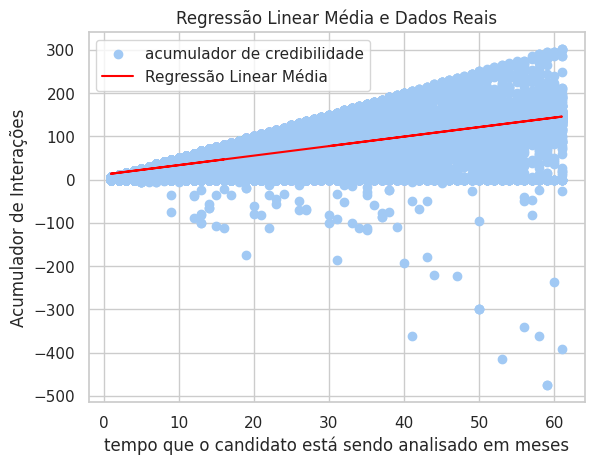


MSE Médio: 5569.61

MAE Médio: 58.50


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X = merged_df['soma']
y = merged_df['acumulador_de_credibilidade']

# Configurações
num_iterations = 30
coefficients_list = []

# Configurações
num_iterations = 30
coefficients_list = []
mse_list = []
mae_list = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Dividir os dados em conjuntos de treinamento e teste com reposição (bootstrapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Adicionando uma constante para a interceptação
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Criando um modelo de regressão linear
    model = sm.OLS(y_train, X_train_const).fit()

    # Armazenar os coeficientes estimados
    coefficients_list.append(model.params)

        # Calcular o Erro Médio Quadrático
    mse = mean_squared_error(y_test, y_pred)

    # Armazenar o MSE na lista
    mse_list.append(mse)

    # Calcular o MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

# Calcular a média dos coeficientes estimados
average_coefficients = np.mean(coefficients_list, axis=0)

# Imprimir os resultados da média dos coeficientes
print("Média dos Coeficientes:")
print(average_coefficients)

# Criar um gráfico com os dados reais e a linha de regressão
plt.scatter(X, y, label='acumulador de credibilidade')
plt.plot(X, average_coefficients[0] + average_coefficients[1] * X, color='red', label='Regressão Linear Média')
plt.xlabel('tempo que o candidato está sendo analisado em meses')
plt.ylabel('Acumulador de Interações')
plt.legend()
plt.title('Regressão Linear Média e Dados Reais')
plt.show()


'''print("MSEs em cada iteração:")
for mse in mse_list:
    print(mse)'''



# Calcular a média do MSE
average_mse = np.mean(mse_list)

# Imprimir a média do MSE
print(f'\nMSE Médio: {average_mse:.2f}')

'''print("\n\n MAEs em cada iteração (suavizando para os outliers):")
for mae in mae_list:
    print(mae)'''

# Calcular a média do MSE
average_mae = np.mean(mae_list)

# Imprimir a média do MSE
print(f'\nMAE Médio: {average_mae:.2f}')

In [ ]:
from scipy.stats import ttest_1samp

# Valor de referência para a média verdadeira do MSE
valor_referencia = 0.05

# Hipótese nula: a média verdadeira do MSE é igual ao valor de referência
# Hipótese alternativa: a média verdadeira do MSE é diferente do valor de referência
hipotese_nula = f'A média verdadeira do MSE é {valor_referencia}'
hipotese_alternativa = f'A média verdadeira do MSE é diferente de {valor_referencia}'

# Realiza o teste de hipótese
teste_t, valor_p = ttest_1samp(mse_list, valor_referencia)

# Exibe os resultados
print(f'\nHipótese Nula: {hipotese_nula}')
print(f'Hipótese Alternativa: {hipotese_alternativa}')
print(f'\nEstatística do Teste t: {teste_t:.4f}')
print(f'Valor-p: {valor_p:.4f}')

# Compara o valor-p com o nível de significância (por exemplo, 0.05)
nivel_significancia = 0.05
if valor_p < nivel_significancia:
    print('\nRejeita-se a hipótese nula. A média verdadeira é significativamente diferente do valor de referência.')
else:
    print('\nNão há evidências para rejeitar a hipótese nula. A média verdadeira não é significativamente diferente do valor de referência.')


Hipótese Nula: A média verdadeira do MSE é 0.05
Hipótese Alternativa: A média verdadeira do MSE é diferente de 0.05

Estatística do Teste t: 354.8074
Valor-p: 0.0000

Rejeita-se a hipótese nula. A média verdadeira é significativamente diferente do valor de referência.


Média dos Coeficientes:
[49.41899724  0.19871627]


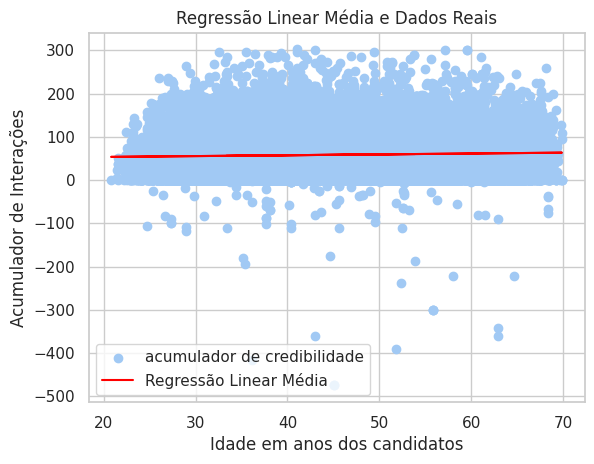


MSE Médio: 5569.61

MAE Médio: 58.50


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X = merged_df['DAYS_BIRTH']
y = merged_df['acumulador_de_credibilidade']

# Configurações
num_iterations = 30
coefficients_list = []

# Configurações
num_iterations = 30
coefficients_list = []
mse_list = []
mae_list = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Dividir os dados em conjuntos de treinamento e teste com reposição (bootstrapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Adicionando uma constante para a interceptação
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Criando um modelo de regressão linear
    model = sm.OLS(y_train, X_train_const).fit()

    # Armazenar os coeficientes estimados
    coefficients_list.append(model.params)

        # Calcular o Erro Médio Quadrático
    mse = mean_squared_error(y_test, y_pred)

    # Armazenar o MSE na lista
    mse_list.append(mse)

    # Calcular o MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

# Calcular a média dos coeficientes estimados
average_coefficients = np.mean(coefficients_list, axis=0)

# Imprimir os resultados da média dos coeficientes
print("Média dos Coeficientes:")
print(average_coefficients)

# Criar um gráfico com os dados reais e a linha de regressão
plt.scatter(X, y, label='acumulador de credibilidade')
plt.plot(X, average_coefficients[0] + average_coefficients[1] * X, color='red', label='Regressão Linear Média')
plt.xlabel('Idade em anos dos candidatos')
plt.ylabel('Acumulador de Interações')
plt.legend()
plt.title('Regressão Linear Média e Dados Reais')
plt.show()


'''print("MSEs em cada iteração:")
for mse in mse_list:
    print(mse)'''


# Calcular a média do MSE
average_mse = np.mean(mse_list)

# Imprimir a média do MSE
print(f'\nMSE Médio: {average_mse:.2f}')

'''print("\n\n MAEs em cada iteração (suavizando para os outliers):")
for mae in mae_list:
    print(mae)'''

# Calcular a média do MSE
average_mae = np.mean(mae_list)

# Imprimir a média do MSE
print(f'\nMAE Médio: {average_mae:.2f}')

# Regressão Não Paramétrica


Nadaraya-Watson - MAE Médio: 58.68, MSE Médio: 5595.36
Loess - MAE Médio: 46.19, MSE Médio: 3429.79


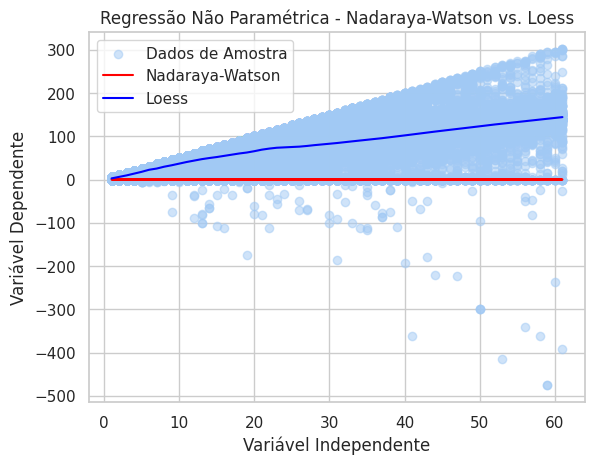

In [ ]:
X = merged_df['soma'].values
y = merged_df['acumulador_de_credibilidade'].values

# Configurações
num_iterations = 30
bandwidth_nadaraya_watson = 0.1  # Ajuste o valor conforme necessário para Nadaraya-Watson
frac_loess = 0.1  # Ajuste o valor conforme necessário para Loess

# Listas para armazenar as métricas
mae_nadaraya_watson_list = []
mse_nadaraya_watson_list = []
mae_loess_list = []
mse_loess_list = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Amostragem aleatória com reposição (bootstrapping)
    indices_amostra = np.random.choice(len(X), size=len(X), replace=True)
    X_amostra, y_amostra = X[indices_amostra], y[indices_amostra]

    # Nadaraya-Watson
    kde = KernelDensity(bandwidth=bandwidth_nadaraya_watson, kernel='gaussian')
    kde.fit(X_amostra.reshape(-1, 1))
    log_dens = kde.score_samples(X_amostra.reshape(-1, 1))
    y_pred_nadaraya_watson = np.exp(log_dens)
    mae_nadaraya_watson = mean_absolute_error(y_amostra, y_pred_nadaraya_watson)
    mse_nadaraya_watson = mean_squared_error(y_amostra, y_pred_nadaraya_watson)
    mae_nadaraya_watson_list.append(mae_nadaraya_watson)
    mse_nadaraya_watson_list.append(mse_nadaraya_watson)

    # Loess
    loess = sm.nonparametric.lowess(y_amostra, X_amostra, frac=frac_loess)
    X_loess, y_loess = loess.T
    mae_loess = mean_absolute_error(y_amostra, y_loess)
    mse_loess = mean_squared_error(y_amostra, y_loess)
    mae_loess_list.append(mae_loess)
    mse_loess_list.append(mse_loess)

# Calcular as médias
mae_nadaraya_watson_media = np.mean(mae_nadaraya_watson_list)
mse_nadaraya_watson_media = np.mean(mse_nadaraya_watson_list)
mae_loess_media = np.mean(mae_loess_list)
mse_loess_media = np.mean(mse_loess_list)

# Imprimir as médias
print(f"Nadaraya-Watson - MAE Médio: {mae_nadaraya_watson_media:.2f}, MSE Médio: {mse_nadaraya_watson_media:.2f}")
print(f"Loess - MAE Médio: {mae_loess_media:.2f}, MSE Médio: {mse_loess_media:.2f}")

# Plotar os resultados
plt.scatter(X, y, alpha=0.5, label='Dados de Amostra')
plt.plot(X_amostra, y_pred_nadaraya_watson, label='Nadaraya-Watson', color='red')
plt.plot(X_loess, y_loess, label='Loess', color='blue')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.title('Regressão Não Paramétrica - Nadaraya-Watson vs. Loess')
plt.show()

###Retirar ouliers pois eles proavelmente estão enviesando meu modelo

In [ ]:
media_coluna_origem = merged_df['acumulador_de_credibilidade'].mean()
desvio_padrao_coluna_origem = merged_df['acumulador_de_credibilidade'].std()

# Defina um limiar para identificar outliers (por exemplo, 3 desvios padrão)
limiar_outliers = 3

# Crie uma nova coluna com base na coluna de origem, substituindo outliers pela média
merged_df['acumulador_sem_outliers'] = np.where(
    np.abs(merged_df['acumulador_de_credibilidade'] - media_coluna_origem) > limiar_outliers * desvio_padrao_coluna_origem,
    media_coluna_origem,
    merged_df['acumulador_de_credibilidade']
)

Regressão linear

Média dos Coeficientes:
[13.75185209  2.02740439]


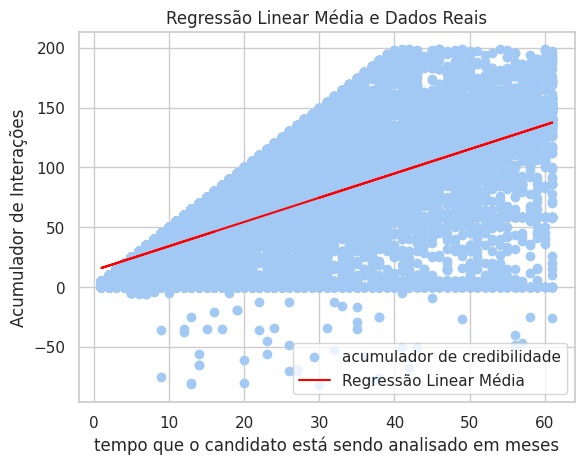


MSE Médio: 5070.95

MAE Médio: 56.82


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X = merged_df['soma']
y = merged_df['acumulador_sem_outliers']

# Configurações
num_iterations = 30
coefficients_list = []

# Configurações
num_iterations = 30
coefficients_list = []
mse_list = []
mae_list = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Dividir os dados em conjuntos de treinamento e teste com reposição (bootstrapping)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Adicionando uma constante para a interceptação
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    # Criando um modelo de regressão linear
    model = sm.OLS(y_train, X_train_const).fit()

    # Armazenar os coeficientes estimados
    coefficients_list.append(model.params)

        # Calcular o Erro Médio Quadrático
    mse = mean_squared_error(y_test, y_pred)

    # Armazenar o MSE na lista
    mse_list.append(mse)

    # Calcular o MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)

# Calcular a média dos coeficientes estimados
average_coefficients = np.mean(coefficients_list, axis=0)

# Imprimir os resultados da média dos coeficientes
print("Média dos Coeficientes:")
print(average_coefficients)

# Criar um gráfico com os dados reais e a linha de regressão
plt.scatter(X, y, label='acumulador de credibilidade')
plt.plot(X, average_coefficients[0] + average_coefficients[1] * X, color='red', label='Regressão Linear Média')
plt.xlabel('tempo que o candidato está sendo analisado em meses')
plt.ylabel('Acumulador de Interações')
plt.legend()
plt.title('Regressão Linear Média e Dados Reais')
plt.show()


'''print("MSEs em cada iteração:")
for mse in mse_list:
    print(mse)'''



# Calcular a média do MSE
average_mse = np.mean(mse_list)

# Imprimir a média do MSE
print(f'\nMSE Médio: {average_mse:.2f}')

'''print("\n\n MAEs em cada iteração (suavizando para os outliers):")
for mae in mae_list:
    print(mae)'''

# Calcular a média do MSE
average_mae = np.mean(mae_list)

# Imprimir a média do MSE
print(f'\nMAE Médio: {average_mae:.2f}')

Nadaraya-Watson - MAE Médio: 58.74, MSE Médio: 5602.78
Loess - MAE Médio: 46.09, MSE Médio: 3421.03


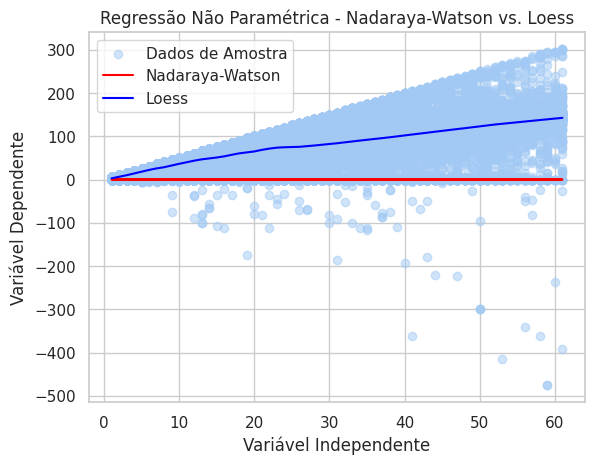

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity  # Certifique-se de importar KernelDensity
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
X = merged_df['soma'].values
y = merged_df['acumulador_de_credibilidade'].values

# Configurações
num_iterations = 30
bandwidth_nadaraya_watson = 0.1  # Ajuste o valor conforme necessário para Nadaraya-Watson
frac_loess = 0.1  # Ajuste o valor conforme necessário para Loess

# Listas para armazenar as métricas
mae_nadaraya_watson_list = []
mse_nadaraya_watson_list = []
mae_loess_list = []
mse_loess_list = []

# Repetir o teste 30 vezes
for i in range(num_iterations):
    # Amostragem aleatória com reposição (bootstrapping)
    indices_amostra = np.random.choice(len(X), size=len(X), replace=True)
    X_amostra, y_amostra = X[indices_amostra], y[indices_amostra]

    # Nadaraya-Watson
    kde = KernelDensity(bandwidth=bandwidth_nadaraya_watson, kernel='gaussian')
    kde.fit(X_amostra.reshape(-1, 1))
    log_dens = kde.score_samples(X_amostra.reshape(-1, 1))
    y_pred_nadaraya_watson = np.exp(log_dens)
    mae_nadaraya_watson = mean_absolute_error(y_amostra, y_pred_nadaraya_watson)
    mse_nadaraya_watson = mean_squared_error(y_amostra, y_pred_nadaraya_watson)
    mae_nadaraya_watson_list.append(mae_nadaraya_watson)
    mse_nadaraya_watson_list.append(mse_nadaraya_watson)

    # Loess
    loess = sm.nonparametric.lowess(y_amostra, X_amostra, frac=frac_loess)
    X_loess, y_loess = loess.T
    mae_loess = mean_absolute_error(y_amostra, y_loess)
    mse_loess = mean_squared_error(y_amostra, y_loess)
    mae_loess_list.append(mae_loess)
    mse_loess_list.append(mse_loess)

# Calcular as médias
mae_nadaraya_watson_media = np.mean(mae_nadaraya_watson_list)
mse_nadaraya_watson_media = np.mean(mse_nadaraya_watson_list)
mae_loess_media = np.mean(mae_loess_list)
mse_loess_media = np.mean(mse_loess_list)

# Imprimir as médias
print(f"Nadaraya-Watson - MAE Médio: {mae_nadaraya_watson_media:.2f}, MSE Médio: {mse_nadaraya_watson_media:.2f}")
print(f"Loess - MAE Médio: {mae_loess_media:.2f}, MSE Médio: {mse_loess_media:.2f}")

# Plotar os resultados
plt.scatter(X, y, alpha=0.5, label='Dados de Amostra')
plt.plot(X_amostra, y_pred_nadaraya_watson, label='Nadaraya-Watson', color='red')
plt.plot(X_loess, y_loess, label='Loess', color='blue')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.title('Regressão Não Paramétrica - Nadaraya-Watson vs. Loess')
plt.show()

### teste sem os outliers, kernel gaussiano

MSE Médio Nadaraya Watson (Gaussiano): 5579.659835749067
MAE Médio Nadaraya Watson (Gaussiano): 58.68120293050878
MSE Médio Loess: 1118.774969986577
MAE Médio Loess: 20.369887968937455


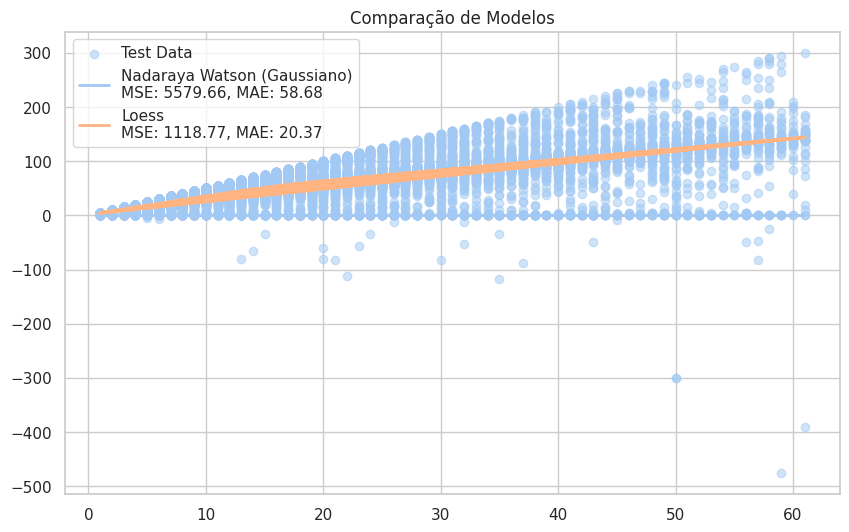

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.smoothers_lowess import lowess

# Suponha que você tenha um DataFrame chamado 'data' com colunas 'X' e 'y'
# Substitua isso pelos nomes reais das suas colunas
X = merged_df['soma'].values
y = merged_df['acumulador_de_credibilidade'].values

# Número de simulações
num_simulations = 30

# Parâmetro do kernel Gaussiano
bandwidth = 1.0  # Ajuste conforme necessário

# Listas para armazenar os MSEs e MAEs
mse_kernel = []
mae_kernel = []
mse_loess = []
mae_loess = []

# Realize as simulações
for _ in range(num_simulations):
    # Divida os dados em treinamento (70%) e teste (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Amostragem com reposição
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_sample = X_train[indices]
    y_train_sample = y_train[indices]

    # Modelo Nadaraya Watson (Gaussiano)
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(X_train_sample.reshape(-1, 1))
    log_dens = kde.score_samples(X_test.reshape(-1, 1))
    y_pred_kernel = np.exp(log_dens)
    mse_kernel.append(mean_squared_error(y_test, y_pred_kernel))
    mae_kernel.append(mean_absolute_error(y_test, y_pred_kernel))

    # Modelo Loess
    lowess_model = lowess(y_train_sample, X_train_sample)
    y_pred_loess = np.interp(X_test, lowess_model[:, 0], lowess_model[:, 1])
    mse_loess.append(mean_squared_error(y_test, y_pred_loess))
    mae_loess.append(mean_absolute_error(y_test, y_pred_loess))

# Calcule as médias dos MSEs e MAEs
avg_mse_kernel = np.mean(mse_kernel)
avg_mae_kernel = np.mean(mae_kernel)
avg_mse_loess = np.mean(mse_loess)
avg_mae_loess = np.mean(mae_loess)

# Print das médias dos MSEs e MAEs
print(f'MSE Médio Nadaraya Watson (Gaussiano): {avg_mse_kernel}')
print(f'MAE Médio Nadaraya Watson (Gaussiano): {avg_mae_kernel}')
print(f'MSE Médio Loess: {avg_mse_loess}')
print(f'MAE Médio Loess: {avg_mae_loess}')

# Crie um gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)

# Nadaraya Watson (Gaussiano)
plt.plot(X_test, y_pred_kernel, label=f'Nadaraya Watson (Gaussiano)\nMSE: {avg_mse_kernel:.2f}, MAE: {avg_mae_kernel:.2f}', linewidth=2)

# Loess
plt.plot(X_test, y_pred_loess, label=f'Loess\nMSE: {avg_mse_loess:.2f}, MAE: {avg_mae_loess:.2f}', linewidth=2)

plt.legend()
plt.title('Comparação de Modelos')
plt.show()

In [ ]:
mse_kernel = []
mae_kernel = []
mse_loess = []
mae_loess = []
avg_mse_kernel = np.mean(mse_kernel)
avg_mae_kernel = np.mean(mae_kernel)
avg_mse_loess = np.mean(mse_loess)
avg_mae_loess = np.mean(mae_loess)

remoção de Outliers

MSE Médio Nadaraya Watson (Kernel): 1088.5399508229807
MAE Médio Nadaraya Watson (Kernel): 22.340783387245313
MSE Médio Loess: 947.5030147042158
MAE Médio Loess: 19.69490497460603


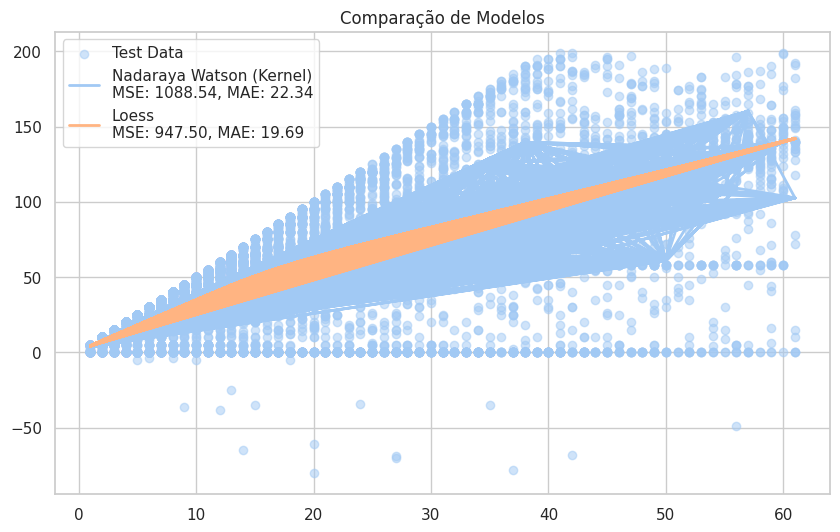

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess

# Suponha que você tenha um DataFrame chamado 'data' com colunas 'X' e 'y'
# Substitua isso pelos nomes reais das suas colunas
X = merged_df['soma'].values
y = merged_df['acumulador_sem_outliers'].values

# Número de simulações
num_simulations = 30

# Listas para armazenar os MSEs e MAEs
mse_kernel = []
mae_kernel = []
mse_loess = []
mae_loess = []

# Realize as simulações
for _ in range(num_simulations):
    # Divida os dados em treinamento (70%) e teste (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Amostragem com reposição
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_sample = X_train[indices]
    y_train_sample = y_train[indices]

    # Modelo Nadaraya Watson (Kernel)
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_sample.reshape(-1, 1), y_train_sample)
    y_pred_kernel = knn.predict(X_test.reshape(-1, 1))
    mse_kernel.append(mean_squared_error(y_test, y_pred_kernel))
    mae_kernel.append(mean_absolute_error(y_test, y_pred_kernel))

    # Modelo Loess
    lowess_model = lowess(y_train_sample, X_train_sample)
    y_pred_loess = np.interp(X_test, lowess_model[:, 0], lowess_model[:, 1])
    mse_loess.append(mean_squared_error(y_test, y_pred_loess))
    mae_loess.append(mean_absolute_error(y_test, y_pred_loess))

# Calcule as médias dos MSEs e MAEs
avg_mse_kernel = np.mean(mse_kernel)
avg_mae_kernel = np.mean(mae_kernel)
avg_mse_loess = np.mean(mse_loess)
avg_mae_loess = np.mean(mae_loess)

# Print das médias dos MSEs e MAEs
print(f'MSE Médio Nadaraya Watson (Kernel): {avg_mse_kernel}')
print(f'MAE Médio Nadaraya Watson (Kernel): {avg_mae_kernel}')
print(f'MSE Médio Loess: {avg_mse_loess}')
print(f'MAE Médio Loess: {avg_mae_loess}')

# Crie um gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Test Data', alpha=0.5)

# Nadaraya Watson (Kernel)
plt.plot(X_test, y_pred_kernel, label=f'Nadaraya Watson (Kernel)\nMSE: {avg_mse_kernel:.2f}, MAE: {avg_mae_kernel:.2f}', linewidth=2)

# Loess
plt.plot(X_test, y_pred_loess, label=f'Loess\nMSE: {avg_mse_loess:.2f}, MAE: {avg_mae_loess:.2f}', linewidth=2)

plt.legend()
plt.title('Comparação de Modelos')
plt.show()

In [ ]:
from scipy import stats

# Dados dos MSEs e MAEs dos modelos
mse_nadaraya_watson = np.array(mse_kernel)
mae_nadaraya_watson = np.array(mae_kernel)
mse_loess = np.array(mse_loess)
mae_loess = np.array(mae_loess)

# Teste t de Student pareado para MSE
t_stat_mse, p_value_mse = stats.ttest_rel(mse_nadaraya_watson, mse_loess)

# Teste t de Student pareado para MAE
t_stat_mae, p_value_mae = stats.ttest_rel(mae_nadaraya_watson, mae_loess)

# Exibição dos resultados
print(f'Teste t de Student pareado para MSE: Estatística = {t_stat_mse}, Valor p = {p_value_mse}')
print(f'Teste t de Student pareado para MAE: Estatística = {t_stat_mae}, Valor p = {p_value_mae}')

# Verifique se o valor p é menor que o nível de significância (por exemplo, 0.05) para rejeitar a hipótese nula.
alpha = 0.05
if p_value_mse < alpha:
    print('Rejeitar a hipótese nula para MSE - Há uma diferença significativa.')
else:
    print('Não rejeitar a hipótese nula para MSE - Não há evidências de diferença significativa.')

if p_value_mae < alpha:
    print('Rejeitar a hipótese nula para MAE - Há uma diferença significativa.')
else:
    print('Não rejeitar a hipótese nula para MAE - Não há evidências de diferença significativa.')

Teste t de Student pareado para MSE: Estatística = nan, Valor p = nan
Teste t de Student pareado para MAE: Estatística = nan, Valor p = nan
Não rejeitar a hipótese nula para MSE - Não há evidências de diferença significativa.
Não rejeitar a hipótese nula para MAE - Não há evidências de diferença significativa.


MSE Médio Nadaraya Watson (Gaussiano): 5116.364347058242
MAE Médio Nadaraya Watson (Gaussiano): 57.12404498681255
MSE Médio Loess: 1871.411987854591
MAE Médio Loess: 34.710987133704656


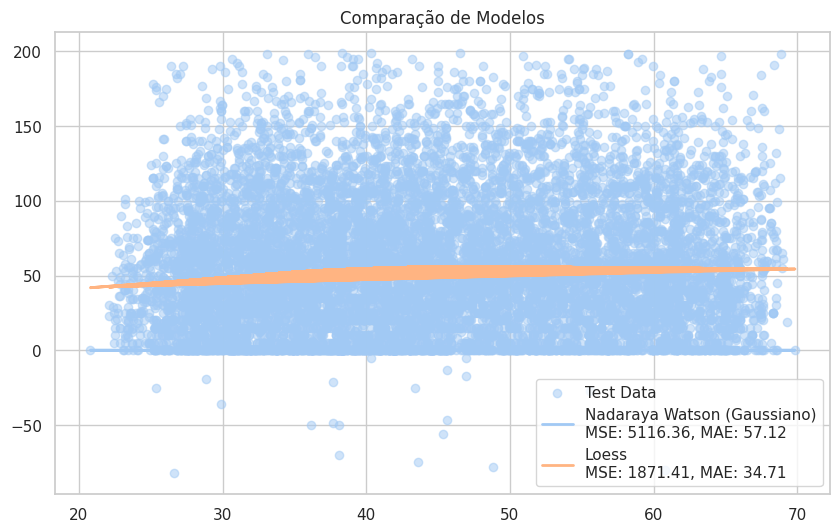

In [ ]:
X = merged_df[['DAYS_BIRTH', 'soma', 'classificação_credibilidade']].values  # Substitua 'X1', 'X2', 'X3' pelos nomes reais das suas variáveis independentes
y = merged_df['acumulador_sem_outliers'].values

# Número de simulações
num_simulations = 30

# Parâmetro do kernel Gaussiano
bandwidth = 1.0  # Ajuste conforme necessário

# Listas para armazenar os MSEs e MAEs
mse_kernel = []
mae_kernel = []
mse_loess = []
mae_loess = []

# Realize as simulações
for _ in range(num_simulations):
    # Divida os dados em treinamento (70%) e teste (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Amostragem com reposição
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_sample = X_train[indices]
    y_train_sample = y_train[indices]

    # Modelo Nadaraya Watson (Gaussiano)
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(X_train_sample)
    log_dens = kde.score_samples(X_test)
    y_pred_kernel = np.exp(log_dens)
    mse_kernel.append(mean_squared_error(y_test, y_pred_kernel))
    mae_kernel.append(mean_absolute_error(y_test, y_pred_kernel))

    # Modelo Loess (Aqui, assumindo apenas uma variável independente)
    lowess_model = lowess(y_train_sample, X_train_sample[:, 0])
    y_pred_loess = np.interp(X_test[:, 0], lowess_model[:, 0], lowess_model[:, 1])
    mse_loess.append(mean_squared_error(y_test, y_pred_loess))
    mae_loess.append(mean_absolute_error(y_test, y_pred_loess))

# Calcule as médias dos MSEs e MAEs
avg_mse_kernel = np.mean(mse_kernel)
avg_mae_kernel = np.mean(mae_kernel)
avg_mse_loess = np.mean(mse_loess)
avg_mae_loess = np.mean(mae_loess)

# Print das médias dos MSEs e MAEs
print(f'MSE Médio Nadaraya Watson (Gaussiano): {avg_mse_kernel}')
print(f'MAE Médio Nadaraya Watson (Gaussiano): {avg_mae_kernel}')
print(f'MSE Médio Loess: {avg_mse_loess}')
print(f'MAE Médio Loess: {avg_mae_loess}')

# Crie um gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Test Data', alpha=0.5)

# Nadaraya Watson (Gaussiano)
plt.plot(X_test[:, 0], y_pred_kernel, label=f'Nadaraya Watson (Gaussiano)\nMSE: {avg_mse_kernel:.2f}, MAE: {avg_mae_kernel:.2f}', linewidth=2)

# Loess
plt.plot(X_test[:, 0], y_pred_loess, label=f'Loess\nMSE: {avg_mse_loess:.2f}, MAE: {avg_mae_loess:.2f}', linewidth=2)

plt.legend()
plt.title('Comparação de Modelos')
plt.show()

MSE Médio Nadaraya Watson (Gaussiano): 0.5084629274463778
MAE Médio Nadaraya Watson (Gaussiano): 0.5084625748621613
MSE Médio Loess: 0.502351528418928
MAE Médio Loess: 0.5365126633741227


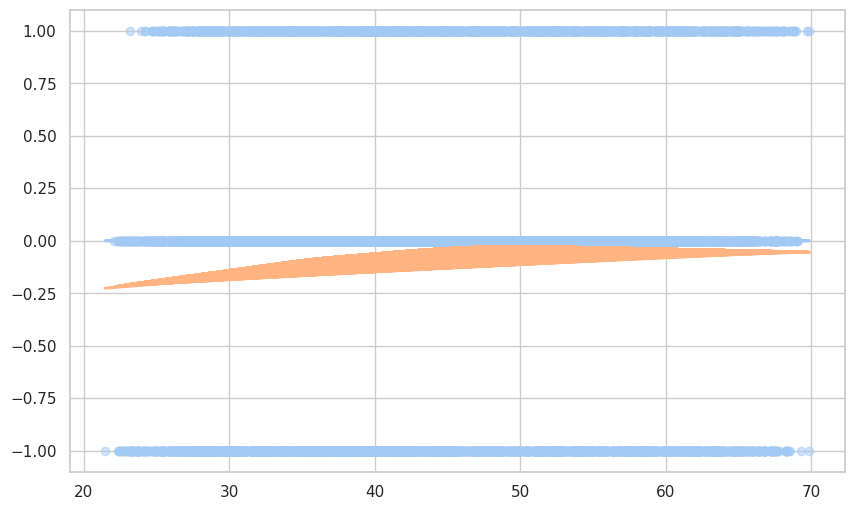

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess
X = merged_df[['DAYS_BIRTH', 'soma', 'acumulador_sem_outliers']].values  # Substitua 'X1', 'X2', 'X3' pelos nomes reais das suas variáveis independentes
y = merged_df['classificação_credibilidade'].values

# Número de simulações
num_simulations = 30

# Parâmetro do kernel Gaussiano
bandwidth = 1.0  # Ajuste conforme necessário

# Listas para armazenar os MSEs e MAEs
mse_kernel = []
mae_kernel = []
mse_loess = []
mae_loess = []

# Realize as simulações
for _ in range(num_simulations):
    # Divida os dados em treinamento (70%) e teste (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Amostragem com reposição
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_sample = X_train[indices]
    y_train_sample = y_train[indices]

    # Modelo Nadaraya Watson (Gaussiano)
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(X_train_sample)
    log_dens = kde.score_samples(X_test)
    y_pred_kernel = np.exp(log_dens)
    mse_kernel.append(mean_squared_error(y_test, y_pred_kernel))
    mae_kernel.append(mean_absolute_error(y_test, y_pred_kernel))

    # Modelo Loess (Aqui, assumindo apenas uma variável independente)
    lowess_model = lowess(y_train_sample, X_train_sample[:, 0])
    y_pred_loess = np.interp(X_test[:, 0], lowess_model[:, 0], lowess_model[:, 1])
    mse_loess.append(mean_squared_error(y_test, y_pred_loess))
    mae_loess.append(mean_absolute_error(y_test, y_pred_loess))

# Calcule as médias dos MSEs e MAEs
avg_mse_kernel = np.mean(mse_kernel)
avg_mae_kernel = np.mean(mae_kernel)
avg_mse_loess = np.mean(mse_loess)
avg_mae_loess = np.mean(mae_loess)

# Print das médias dos MSEs e MAEs
print(f'MSE Médio Nadaraya Watson (Gaussiano): {avg_mse_kernel}')
print(f'MAE Médio Nadaraya Watson (Gaussiano): {avg_mae_kernel}')
print(f'MSE Médio Loess: {avg_mse_loess}')
print(f'MAE Médio Loess: {avg_mae_loess}')

# Crie um gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='Test Data', alpha=0.5)

# Nadaraya Watson (Gaussiano)
plt.plot(X_test[:, 0], y_pred_kernel, label=f'Nadaraya Watson (Gaussiano)\nMSE: {avg_mse_kernel:.2f}, MAE: {avg_mae_kernel:.2f}', linewidth=2)

# Loess
plt.plot(X_test[:, 0], y_pred_loess, label=f'Loess\nMSE: {avg_mse_loess:.2f}, MAE: {avg_mae_loess:.2f}', linewidth=2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.neighbors import KernelDensity
X = merged_df[['DAYS_BIRTH', 'soma', 'acumulador_sem_outliers']].values  # Substitua 'X1', 'X2', 'X3' pelos nomes reais das suas variáveis independentes
y = merged_df['classificação_credibilidade'].values

# Número de simulações
num_simulations = 30

# Parâmetro do kernel Gaussiano
bandwidth = 1.0  # Ajuste conforme necessário

# Listas para armazenar os MSEs e MAEs
mse_kernel = []
mae_kernel = []
mse_loess = []
mae_loess = []

# Realize as simulações
for _ in range(num_simulations):
    # Divida os dados em treinamento (70%) e teste (30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Amostragem com reposição
    indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_train_sample = X_train[indices]
    y_train_sample = y_train[indices]

    # Modelo Nadaraya Watson (Gaussiano)
    kde = KernelDensity(bandwidth=bandwidth)
    kde.fit(X_train_sample)
    log_dens = kde.score_samples(X_test)
    y_pred_kernel = np.exp(log_dens)
    mse_kernel.append(mean_squared_error(y_test, y_pred_kernel))
    mae_kernel.append(mean_absolute_error(y_test, y_pred_kernel))

    # Modelo Loess (Aqui, assumindo apenas uma variável independente)
    lowess_model = lowess(y_train_sample, X_train_sample[:, 0])
    y_pred_loess = np.interp(X_test[:, 0], lowess_model[:, 0], lowess_model[:, 1])
    mse_loess.append(mean_squared_error(y_test, y_pred_loess))
    mae_loess.append(mean_absolute_error(y_test, y_pred_loess))

# Calcule as médias dos MSEs e MAEs
avg_mse_kernel = np.mean(mse_kernel)
avg_mae_kernel = np.mean(mae_kernel)
avg_mse_loess = np.mean(mse_loess)
avg_mae_loess = np.mean(mae_loess)

# Print das médias dos MSEs e MAEs
print(f'MSE Médio Nadaraya Watson (Gaussiano): {avg_mse_kernel}')
print(f'MAE Médio Nadaraya Watson (Gaussiano): {avg_mae_kernel}')
print(f'MSE Médio Loess: {avg_mse_loess}')
print(f'MAE Médio Loess: {avg_mae_loess}')



MSE Médio Nadaraya Watson (Gaussiano): 0.5081592163911316
MAE Médio Nadaraya Watson (Gaussiano): 0.5081592840028128
MSE Médio Loess: 0.5023068943993579
MAE Médio Loess: 0.535782464270616


##Observações pessoais:
- Talvez o que tenha impactado na precisão do meu modelo não foi o peso dos outliers, mas sim uma decisão durante o ETL de deixar os candidatos que possuiriam um longo hisórico mas pouca ou nenhuma solicitação de credito durante o período de observação, talvez seja melhor ajustar os parametros de análise de candidatos para que os que possuem 0 na soma de credibilidade sejam removidos durante a análise